In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import seaborn as sns

### Figure 2. 

In [10]:
fig2_data = pd.read_excel('Table S2_Data_extraction_and_Analysis.xlsx',sheet_name='Fig2 Data')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# fig2_data

[Text(2004, 0, '2004'),
 Text(2005, 0, '2005'),
 Text(2006, 0, '2006'),
 Text(2007, 0, '2007'),
 Text(2008, 0, '2008'),
 Text(2009, 0, '2009'),
 Text(2010, 0, '2010'),
 Text(2011, 0, '2011'),
 Text(2012, 0, '2012'),
 Text(2013, 0, '2013'),
 Text(2014, 0, '2014'),
 Text(2015, 0, '2015'),
 Text(2016, 0, '2016'),
 Text(2017, 0, '2017'),
 Text(2018, 0, '2018'),
 Text(2019, 0, '2019'),
 Text(2020, 0, '2020'),
 Text(2021, 0, '2021'),
 Text(2022, 0, '2022'),
 Text(2023, 0, '2023'),
 Text(2024, 0, '2024')]

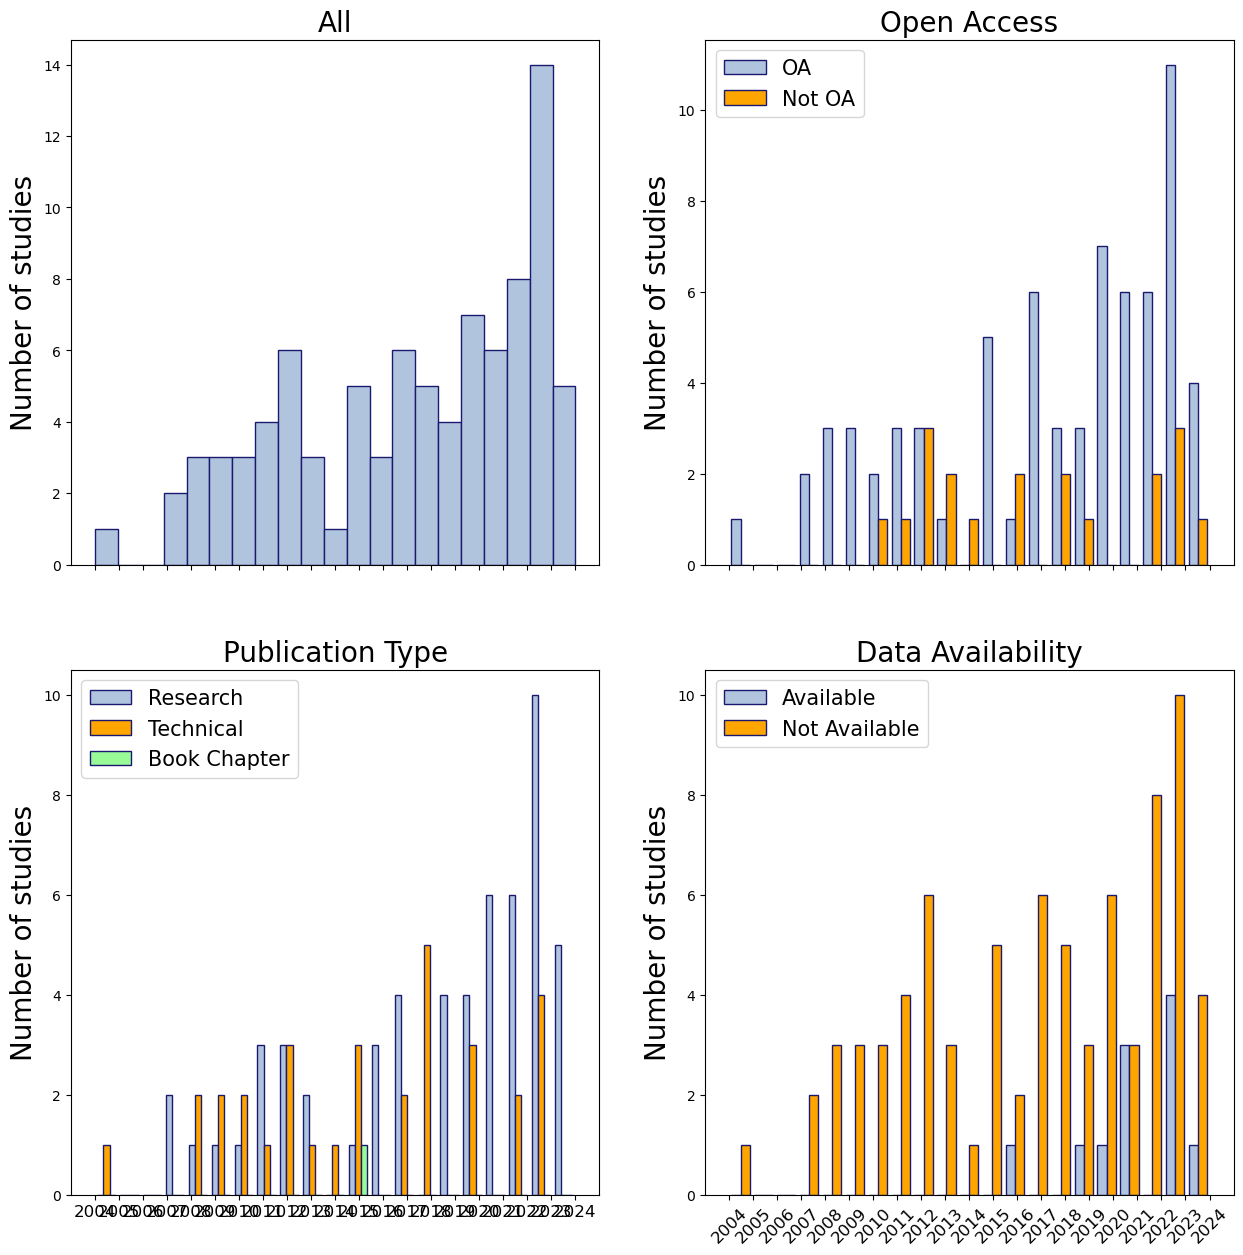

In [12]:
# Make a 4-panel figure 

fig,axs = plt.subplots(2,2,squeeze=False,sharex=True,figsize=(15,15))
x_yrs = [x for x in range(2004, 2025, 1)]
# print(x_yrs)
plt.xticks(ticks=(x_yrs),fontsize=15, rotation=45)
colors = ['lightsteelblue', 'orange']
colors_art = ['lightsteelblue', 'orange', 'palegreen']

# Fig 2A. 
axs[0,0].hist(fig2_data['Year'], bins=21, color='lightsteelblue',edgecolor='midnightblue')           
axs[0,0].set_title('All',fontsize=20)
axs[0,0].set_ylabel('Number of studies',fontsize=20)
# axs[0,0].set_xticks(np.arange(2005,2025,step=1), rotation=45)
# axs[0,0].set_xticklabels(x_yrs,fontsize=12)

# Fig 2B
fig2b_oa = fig2_data[fig2_data['Open Access? (Pubmed) (Yes-1, No-0)']==1]
fig2b_notoa = fig2_data[fig2_data['Open Access? (Pubmed) (Yes-1, No-0)']==0]
year_oa = [fig2b_oa['Year'], fig2b_notoa['Year']]

axs[0,1].hist(year_oa, bins=21, color=colors,edgecolor='midnightblue')
axs[0,1].set_title('Open Access',fontsize=20)
axs[0,1].set_ylabel('Number of studies',fontsize=20)
axs[0,1].legend(['OA', 'Not OA'],fontsize=15)
# axs[0,1].set_xticks(np.arange(2005,2025,step=1), rotation=45)
# axs[0,1].set_xticklabels(x_yrs,fontsize=12)

#Fig 2C
fig2c_res = fig2_data[fig2_data['Article type']=='Research Article']
fig2c_tech = fig2_data[fig2_data['Article type']=='Technical Article']
fig2c_book = fig2_data[fig2_data['Article type']=='Book Chapter']
year_pt = [fig2c_res['Year'], fig2c_tech['Year'], fig2c_book['Year']]

axs[1,0].hist(year_pt, bins=21, color=colors_art,edgecolor='midnightblue')
axs[1,0].set_title('Publication Type',fontsize=20)
axs[1,0].set_ylabel('Number of studies',fontsize=20)
axs[1,0].legend(['Research', 'Technical', 'Book Chapter'],fontsize=15)
# axs[1,0].set_xticks(np.arange(2005,2025,step=1), rotation=45)
axs[1,0].set_xticklabels(x_yrs,fontsize=12)

#Fig 2D
fig2d_da = fig2_data[fig2_data['Data Availability (Y-1, N-0)']==1]
fig2d_dnota = fig2_data[fig2_data['Data Availability (Y-1, N-0)']==0]
year_da = [fig2d_da['Year'], fig2d_dnota['Year']]

axs[1,1].hist(year_da, bins=21, color=colors,edgecolor='midnightblue')
axs[1,1].set_title('Data Availability',fontsize=20)
axs[1,1].set_ylabel('Number of studies',fontsize=20)
axs[1,1].legend(['Available', 'Not Available'],fontsize=15)
# axs[1,1].set_xticks(np.arange(2005,2025,step=1), rotation=45)
axs[1,1].set_xticklabels(x_yrs,fontsize=12)

# plt.savefig('Fig2 histograms.png')

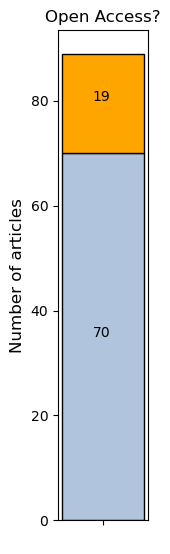

In [14]:
# 2B - stacked bar - open access
oa = sum(fig2_data['Open Access? (Pubmed) (Yes-1, No-0)'])
oa
not_oa = 89-oa
x = ' '

pubtype_bar = plt.figure(figsize = (1,7))
plt.bar(x,oa,color='lightsteelblue',edgecolor='k')
plt.bar(x,not_oa, bottom = oa,color='orange',edgecolor='k')
plt.ylabel('Number of articles',size=12)
plt.title ("Open Access?")
plt.text(-0.1,35,str(oa))
plt.text(-0.1,80,str(not_oa))
plt.subplots_adjust(left=0.1, right=1, bottom=0.2, top=0.9)
# plt.savefig('2B_OA_stackedbar.png')

Text(-0.1, 91, '1')

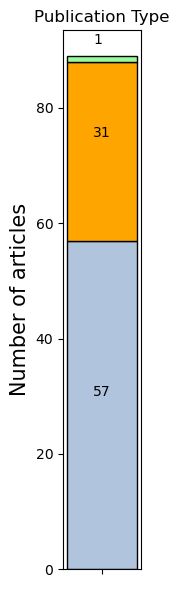

In [16]:
# 2C - stacked bar - pub type

res_art = sum(fig2_data['article count (R - 1, T/B - 0)'])
res_art
tech_art = 88-res_art
bookch = 1
# tech_art
x = ' '

pubtype_bar = plt.figure(figsize = (1,7))
plt.bar(x,res_art,color='lightsteelblue',edgecolor='k')
plt.bar(x,tech_art, bottom = res_art,color='orange',edgecolor='k')
plt.bar(x,bookch,bottom=res_art+tech_art,color='palegreen',edgecolor='k')

plt.ylabel('Number of articles',size=15)
plt.title ("Publication Type")
plt.text(-0.1,30,str(res_art))
plt.text(-0.1,75,str(tech_art))
plt.text(-0.1,91,str(bookch))

# plt.savefig('2C_PT_stackedbar.png')

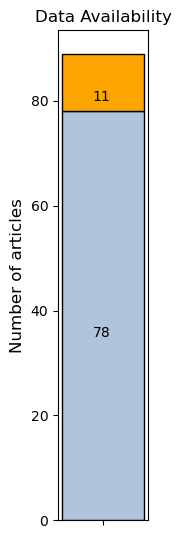

In [20]:
# 2D stacked bar - data availability

da = sum(fig2_data['Data Availability (Y-1, N-0)'])
da
not_da = 89-da
x = ' '

pubtype_bar = plt.figure(figsize = (1,7))
plt.bar(x,not_da,color='lightsteelblue',edgecolor='k')
plt.bar(x,da, bottom = not_da,color='orange',edgecolor='k')
plt.ylabel('Number of articles',size=12)
plt.title ("Data Availability")
plt.text(-0.1,35,str(not_da))
plt.text(-0.1,80,str(da))
plt.subplots_adjust(left=0.1, right=1, bottom=0.2, top=0.9)
# plt.savefig('2D_DA_stackedbar.png')

### Figure 3. 

In [103]:
fig3a_data = pd.read_excel('Table S2_Data_extraction_and_Analysis.xlsx',sheet_name='Fig3A Data')
fig3a_data

,Study ID,Imaging Modality,Modality code,Unnamed: 3,Unnamed: 4,Modality,by study,by dataset,color
0,Antao 2023,SBF-SEM,3,Note:,NaN,FIB-SEM,22.0,31.0,#c44601
1,Antao 2023,SBF-SEM,3,grey indicates where the same study uses the s...,NaN,SXT,21.0,23.0,#000000
2,Attias 2022,FIB-SEM,1,NaN,NaN,SBF-SEM,14.0,16.0,#009E73
3,Bianco 2023,Optical tomography (phase contrast),7,NaN,NaN,ssTEM,8.0,10.0,#56B4E9
4,Burrell 2022,SBF-SEM,3,NaN,NaN,ET,7.0,7.0,#fac72d
...,...,...,...,...,...,...,...,...,...
113,Zechmann 2022,FIB-SEM,1,NaN,NaN,NaN,NaN,NaN,NaN
114,Zechmann 2022,FIB-SEM,1,NaN,NaN,NaN,NaN,NaN,NaN
115,Zechmann 2022,ssTEM,4,NaN,NaN,NaN,NaN,NaN,NaN
116,Zechmann 2022,ssTEM,4,NaN,NaN,NaN,NaN,NaN,NaN


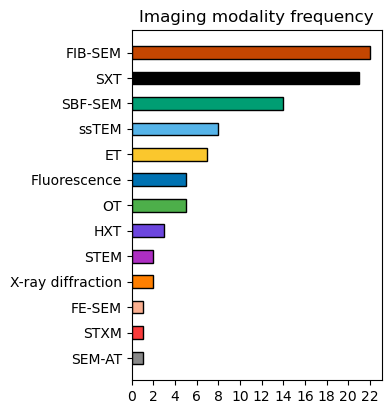

In [133]:
## Fig. 4A. Modality frequency by study
mod_colors = fig3a_data['color']
fig3a_data = pd.read_excel('Table S2_Data_extraction_and_Analysis.xlsx',sheet_name='Fig3A Data')
mod = fig3a_data['Modality'].dropna()
nums = fig3a_data['by study'].dropna()
col = fig3a_data['color'].dropna()

plt.figure(figsize=(5,5))
plt.barh(mod,nums,0.5,color=col,edgecolor='k')
plt.gca().invert_yaxis()
plt.subplots_adjust(left=0.4, right=0.9, bottom=0.2, top=0.9) #prevents labels from being cut off on the left
plt.xticks(np.arange(0, 23, step=2)) 
plt.title('Imaging modality frequency')
plt.savefig('3A_colors_600.png', dpi=600)

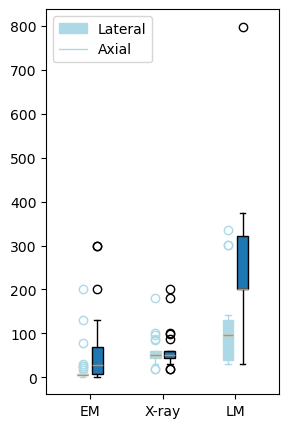

In [175]:
## Fig. 3B resolution B&W
fig3b_data = pd.read_excel('Table S2_Data_extraction_and_Analysis.xlsx',sheet_name='Fig3B Data')

EM_xy = fig3b_data['EM xy'].dropna()
EM_z = fig3b_data['EM z'].dropna()
Xray_xy = fig3b_data['Xray xy'].dropna()
Xray_z = fig3b_data['Xray z'].dropna()
light_xy = fig3b_data['Light xy'].dropna()
light_z = fig3b_data['Light z'].dropna()
labels = ['EM', 'X-ray', 'LM']

plt.figure(figsize=(3,5))

plt.boxplot([EM_xy, Xray_xy, light_xy],widths=0.15, positions=[0.9, 1.9, 2.9], patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='lightblue'),
            capprops=dict(color='lightblue'),
            whiskerprops=dict(color='lightblue'),flierprops=dict(color='lightblue', markeredgecolor='lightblue'))
plt.boxplot([EM_z, Xray_z, light_z],widths=0.15, positions = [1.1, 2.1, 3.1], patch_artist=True)

plt.xticks([1,2,3],labels)
plt.legend(['Lateral','Axial'])
# EM_xy = EM_xy.dropna()
# plt.boxplot(EM_xy)

# plt.savefig('3B_resolution boxplot_3x5_300dpi.png', dpi=300)

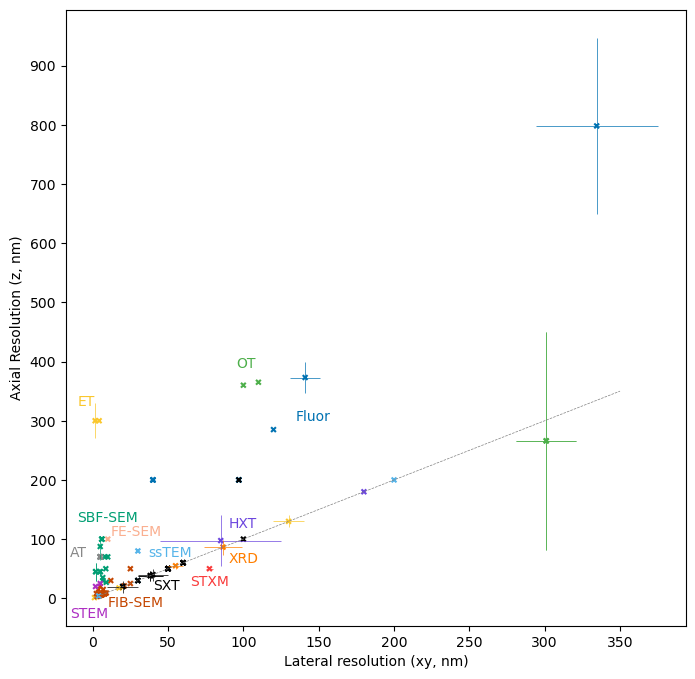

In [183]:
## Fig. 3C

colors = fig3b_data['Color'].dropna()
marks = fig3b_data['Marker'].dropna()
# colors

plt.figure(figsize=(8,8))
plt.scatter(fig3b_data['xy (med)'],fig3b_data['z (med)'],facecolors=colors,marker = 'x',s=12)
plt.errorbar(fig3b_data['xy (med)'],fig3b_data['z (med)'],xerr=fig3b_data['xy error'],yerr=fig3b_data['z (error)'], fmt=' ',ecolor=colors,
            linewidth=0.5)

line_x=[1,100,350]
line_y=[1,100,350]
plt.plot(line_x,line_y,'--',c='gray',linewidth=0.5)

mod = ['AT','ET','FE-SEM','FIB-SEM','Fluor','HXT','OT','SBF-SEM','ssTEM','STEM','STXM','SXT','XRD']
modcol = ['#888888','#fac72d','#faaf90','#c44601','#0072B2','#6c46de','#4daf4a','#009E73','#56B4E9',
          '#AD2EC2','#f93b3b','#000000','#ff7f00']
plt.text(-15,70,'AT',c='#888888')
plt.text(-10,325,'ET',c='#fac72d')
plt.text(12,105,'FE-SEM',c='#faaf90')
plt.text(10,-15,'FIB-SEM',c='#c44601')
plt.text(135,300,'Fluor',c='#0072B2')
plt.text(90,120,'HXT',c='#6c46de')
plt.text(95,390,'OT',c='#4daf4a')
plt.text(-10,130,'SBF-SEM',c='#009E73')
plt.text(37,70,'ssTEM',c='#56B4E9')
plt.text(-15,-33,'STEM',c='#AD2EC2')
plt.text(65,22,'STXM',c='#f93b3b')
plt.text(40,15,'SXT',c='#000000')
plt.text(90,60,'XRD',c='#ff7f00')

plt.yticks([0,100,200,300,400,500,600,700,800,900])
plt.xlabel('Lateral resolution (xy, nm)')
plt.ylabel('Axial Resolution (z, nm)')
plt.savefig('3C_mod res scatter_600dpi.png',dpi=600)

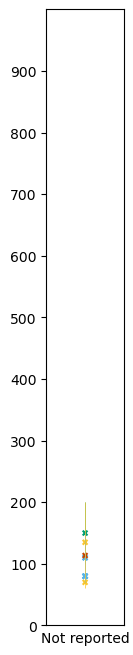

In [189]:
plt.figure(figsize=(1,8))
plt.xticks([])
plt.ylim((0,1000))
plt.yticks([0,100,200,300,400,500,600,700,800,900])

x=[1,1,1,1,1,1,1,1,1,1]
y=[150,70,110,110,113.5,135,80,80,80,80]
yerror=[50,10,40,40,0,65,0,0,0,0]
clr=['#009E73','#fac72d','#56B4E9','#56B4E9','#c44601','#fac72d','#56B4E9','#56B4E9','#56B4E9','#56B4E9']

plt.scatter(x,y,facecolors=clr,marker='x',s=12)
plt.errorbar(x,y,yerr=yerror, fmt=' ',ecolor=clr, linewidth=0.5)
plt.xlabel('Not reported')
plt.savefig('3C_notreported_600dpi.png',dpi=600)

### Figure 4. 

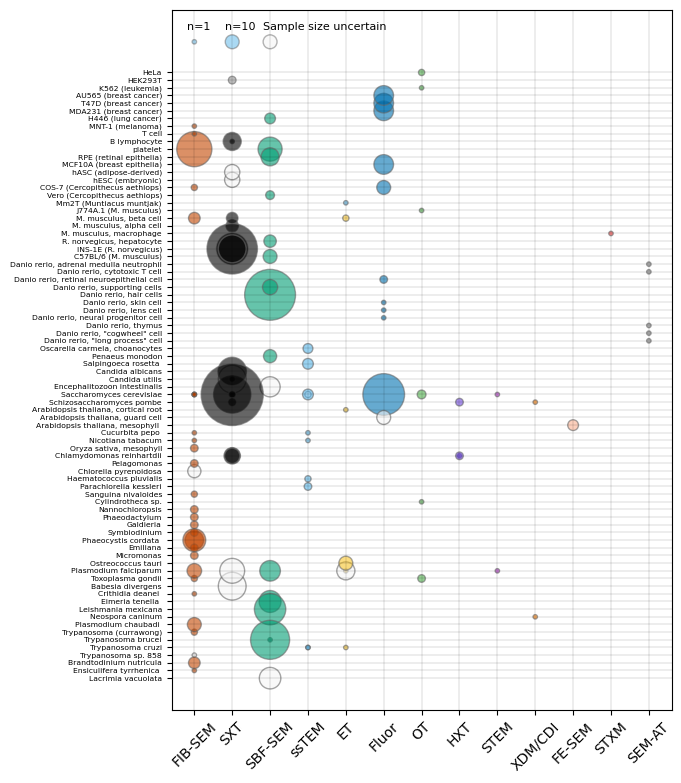

In [229]:
# "Fig4 Data" sheet contains dataset info from "Datasets_Mod_Cell_SS", ordered by "Cell Type Code", 
# as well as condensed version of Cell Type and Cell Type Codes (no duplicates), which are used for the y-axis labels


# Fig. 4A

fig4_data = pd.read_excel('Table S2_Data_extraction_and_Analysis.xlsx',sheet_name='Fig4 Data')

ctc_cond = fig4_data['Code (condensed)']
ct_cond = fig4_data['Cell Type (condensed)'][0:80]
ct_cond

samplesize = fig4_data['Min Sample Size']
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.3, right=0.8, bottom=0.2, top=0.9) #prevents labels from being cut off on the left

# fig4a_labels = set(list(fig4a_data['Cell type (label)']))
# fig4a_labels

f4a_mc = fig4_data['Modality code']
f4a_ctc = fig4_data['Cell Type Code']
f4a_color = fig4_data['Marker color']
# f4a_color

plt.scatter(f4a_mc,f4a_ctc,s=samplesize*10,alpha=0.6,c=f4a_color, edgecolor='dimgrey')

# # set upper limit of arange to the number of model organisms (highest system code)
plt.yticks(np.arange(1,81, step=1), labels=ct_cond, fontsize=5.5)

modalities = ['', 'FIB-SEM', 'SXT', 'SBF-SEM', 'ssTEM', 'ET', 'Fluor', 'OT', 'HXT',
              'STEM', 'XDM/CDI', 'FE-SEM', 'STXM', 'SEM-AT']
plt.xticks(np.arange(0, 14, step=1), labels=modalities, rotation=45) 
plt.grid(linewidth=0.1, color='k')

# legend
leg_size = [10, 100, 100]
leg_color = ['#56B4E9','#56B4E9','whitesmoke']
leg_x = [1,2,3]
leg_y = [84, 84, 84]
plt.scatter(leg_x, leg_y, s=leg_size, alpha=0.5, c=leg_color, edgecolor='dimgrey')
plt.text(0.8,85.5,"n=1",fontsize=8)
plt.text(1.8,85.5,"n=10",fontsize=8)
plt.text(2.8,85.5,"Sample size uncertain",fontsize=8)

plt.savefig('Fig4A_originalaxes_legend_colors_dpi400.png', dpi=400)

In [537]:
# Fig 4A clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15,6))

# X = fig4_data[['Modality code','Cell Type Code']].values
fig4_cluster = pd.read_excel('Table S2_Data_extraction_and_Analysis.xlsx',sheet_name='Fig4A_clustering')
# fig4_cluster=fig4_cluster.dropna()
fig4_cluster
# X = fig4_cluster[['CT Cond','MC List.1','MC List.2','MC List.3']].values
# X
# linkage_data = linkage(X, method='ward', metric='euclidean')
# dendrogram(linkage_data)

# plt.show() 

,Modality code,Cell Type Code,Unnamed: 2,Condensed: Cell type cluster,Unnamed: 4,Unnamed: 5,CT Cond,MC List.1,MC List.2,MC List.3,MC List.4,MC List.5,MC List.6,MC List.7,MC List.8,MC List.9,MC List.10,MC List.11,MC List.12,MC List.13


<Figure size 1500x600 with 0 Axes>

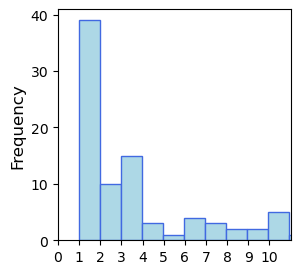

In [239]:
# Fig. 4B

# plt.figure(figsize=(6,5))
# plt.hist(samplesize,bins=20,color='lightblue',edgecolor='royalblue')
# plt.xticks(np.arange(0, 201, step=20),fontsize=12) 
# plt.title('Sample Size')
# plt.ylabel('Frequency', fontsize=15)
# plt.xlabel ('Min # cells per dataset', fontsize=13)
# plt.savefig('Fig4B_dpi600.png', dpi=600)


# inset histogram, x = 0-10
plt.figure(figsize=(3,3))
plt.hist(samplesize,bins=200,color='lightblue',edgecolor='royalblue')
plt.xlim(0,11)
plt.xticks(np.arange(0, 11, step=1),fontsize=10) 
plt.ylabel('Frequency', fontsize=12)
plt.savefig('Fig4B_inset_dpi300.png', dpi=300)

### Figure 5. 

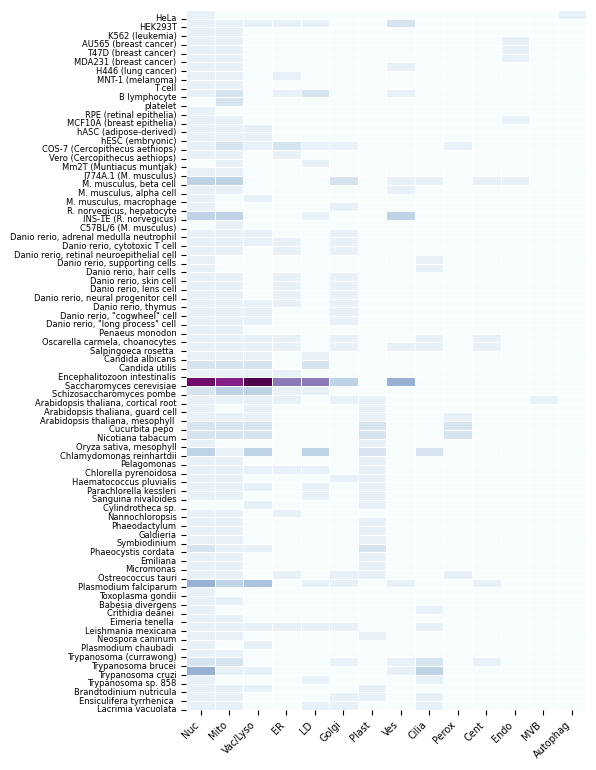

In [611]:
# Fig. 5A

cell_org = pd.read_excel('Table S2_Data_extraction_and_Analysis.xlsx',sheet_name='Fig5AC Data')
# cell_org
cell_org_htmp = cell_org.loc[:,'Nuc':'Autophag'].dropna()
# cell_org = cell_org.fillna("0")
# cell_org = cell_org.drop(['Sum'], axis=1)
# cell_org = cell_org.drop([0])
# cell_org['Cell Type .1'].drop
# cell_org_htmp = cell_org.loc[:, 'Cell Type.1':'autophag.1']
# cell_org_htmp

plt.figure(figsize=(8,10))
plt.subplots_adjust(left=0.3, right=0.8, bottom=0.2, top=0.9) #prevents labels from being cut off on the left

labels5a = cell_org['Cell Type .1'].dropna()
labels5a
labels5a = labels5a[0:80]
# org2_labels

fig5a_htmp = sns.heatmap(cell_org_htmp,cmap='BuPu',linewidth=0.5,cbar=False)
fig5a_htmp.invert_yaxis()

plt.yticks(np.arange(0,80, step=1), labels = labels5a,fontsize=6)
# plt.xlabel(['Nuc','Mito','Vac/Lyso','ER','LD','Golgi','Plast','Ves','Cilia','Perox','Cent','Endo','MVB','Autophag'])
plt.xticks(rotation=45,ha='right',fontsize=7)
plt.savefig('Fig5A_heatmap_600dpi.png', dpi=600)

C:\Users\Mary\anaconda3_091924\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


([<matplotlib.axis.YTick at 0x19b0f2d3050>,
 [Text(1, 0, 'Lacrimia vacuolata'),
  Text(1, 1, 'Ensiculifera tyrrhenica '),
  Text(1, 2, 'Brandtodinium nutricula'),
  Text(1, 3, 'Trypanosoma sp. 858'),
  Text(1, 4, 'Trypanosoma cruzi'),
  Text(1, 5, 'Trypanosoma brucei'),
  Text(1, 6, 'Trypanosoma (currawong)'),
  Text(1, 7, 'Plasmodium chaubadi '),
  Text(1, 8, 'Neospora caninum'),
  Text(1, 9, 'Leishmania mexicana'),
  Text(1, 10, 'Eimeria tenella '),
  Text(1, 11, 'Crithidia deanei '),
  Text(1, 12, 'Babesia divergens'),
  Text(1, 13, 'Toxoplasma gondii'),
  Text(1, 14, 'Plasmodium falciparum'),
  Text(1, 15, 'Ostreococcus tauri'),
  Text(1, 16, 'Micromonas'),
  Text(1, 17, 'Emiliana'),
  Text(1, 18, 'Phaeocystis cordata '),
  Text(1, 19, 'Phaeocystis cordata '),
  Text(1, 20, 'Symbiodinium'),
  Text(1, 21, 'Galdieria'),
  Text(1, 22, 'Phaeodactylum'),
  Text(1, 23, 'Nannochloropsis'),
  Text(1, 24, 'Cylindrotheca sp.'),
  Text(1, 25, 'Sanguina nivaloides'),
  Text(1, 26, 'Parachlorel

<Figure size 500x500 with 0 Axes>

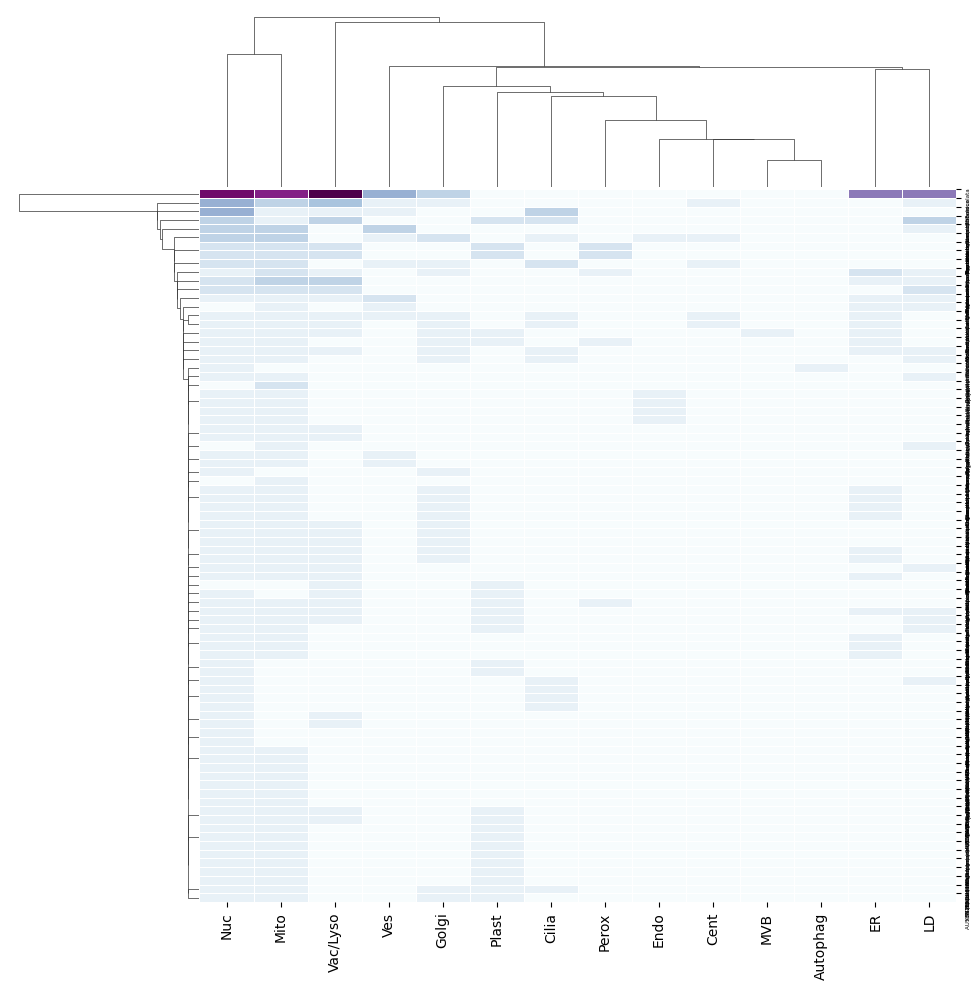

In [595]:
# Fig 5A. hierarchical clustering
plt.figure(figsize=(5,5))
fig5a_htmp_cluster = sns.clustermap(cell_org_htmp,annot=False,method='single',cmap='BuPu',linewidth=0.5,square=True,
                                    cbar_pos=None)
plt.yticks(np.arange(0,82, step=1), labels = labels5a,fontsize=4)



In [593]:
fig5a_htmp_cluster.dendrogram_row.reordered_ind

[38,
 14,
 4,
 30,
 57,
 61,
 32,
 33,
 5,
 65,
 37,
 40,
 80,
 72,
 42,
 43,
 36,
 15,
 9,
 0,
 81,
 71,
 70,
 78,
 77,
 68,
 76,
 66,
 67,
 63,
 60,
 75,
 58,
 56,
 53,
 50,
 48,
 49,
 55,
 45,
 46,
 47,
 54,
 41,
 39,
 24,
 35,
 34,
 28,
 26,
 25,
 74,
 23,
 64,
 18,
 31,
 3,
 52,
 11,
 51,
 7,
 59,
 13,
 69,
 79,
 73,
 62,
 44,
 12,
 6,
 10,
 2,
 19,
 29,
 22,
 21,
 20,
 17,
 8,
 16,
 1,
 27]

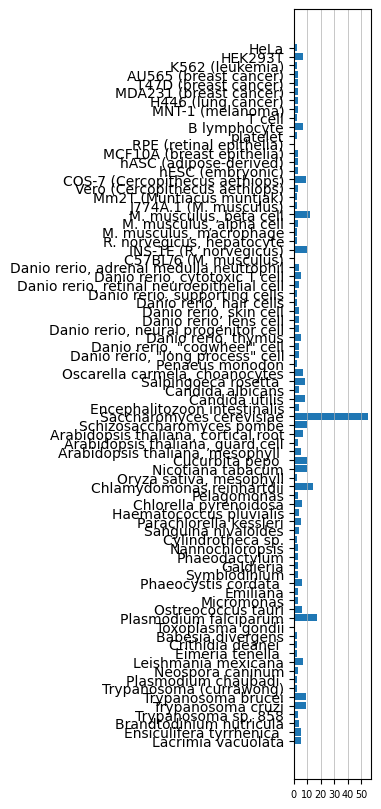

In [613]:
# horizontal bar graph showing total organelle instances per cell type, sub-figure right of heatmap
ct_sum=cell_org['Sum.1'].dropna()
plt.figure(figsize=(1,10))
plt.barh(labels5a,ct_sum)
plt.xticks([0,10,20,30,40,50], fontsize=7)
plt.grid(linewidth=0.5,axis='x')
plt.savefig('Fig5A_celltype_hbar_600dpi.png', dpi=600)

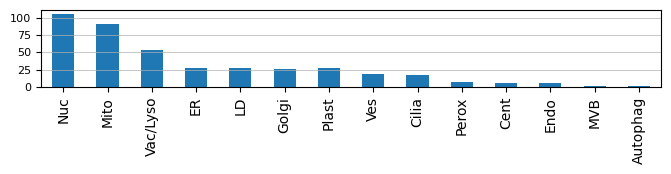

In [615]:
org_sum=cell_org_htmp.sum()
plt.figure(figsize=(3,9))
org_sum.plot.bar(x=None, y=['Sum'],figsize=(8,1))
plt.yticks([0,25,50,75,100], fontsize=8)
plt.grid(linewidth=0.5,axis='y')
plt.savefig('Fig5A _organelle_bar_dpi600.png', dpi=600)

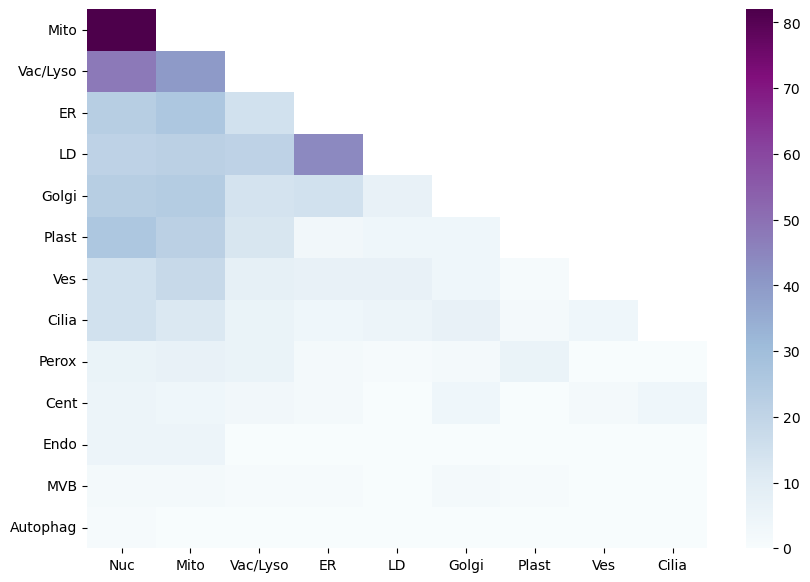

In [623]:
#Fig 5B
org_combos = pd.read_excel('Table S2_Data_extraction_and_Analysis.xlsx', index_col=0, sheet_name='Fig5B Data')
org_combos.dropna()
plt.figure(figsize=(10,7))
org_combos = sns.heatmap(org_combos,cmap='BuPu')
#
plt.savefig('Fig5B_combos_dpi600.png', dpi=600)

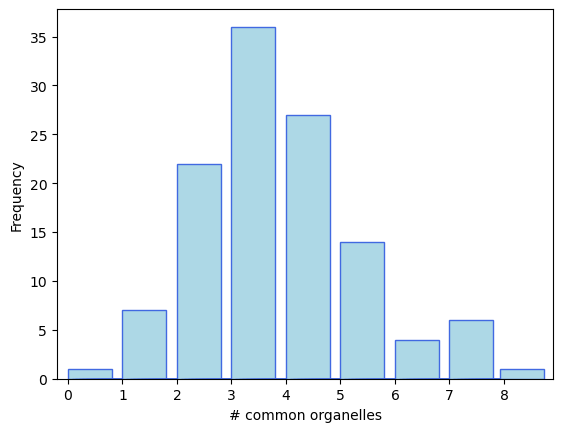

In [428]:
# Fig. 5C

plt.hist(cell_org['Sum'],bins=120,width=0.8,color='lightblue',edgecolor='royalblue')
plt.xlim((-0.2,8.9))
plt.xticks([0,1,2,3,4,5,6,7,8])
plt.xlabel('# common organelles')
plt.ylabel('Frequency')
plt.savefig('Fig5C_600dpi.png', dpi=600)

### Figure 6.

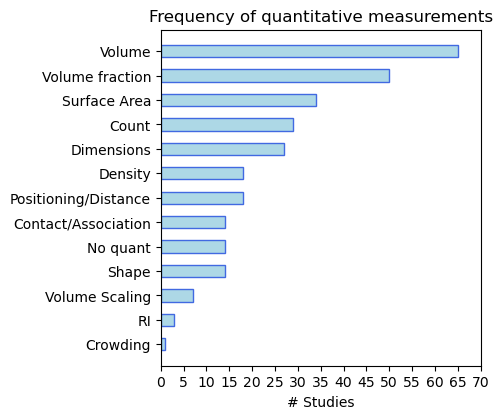

In [445]:
# Fig. 6A
# bar graph of quantification frequency
quants = pd.read_excel('Table S2_Data_extraction_and_Analysis.xlsx',sheet_name='Fig6A Data')
quants
plt.barh(quants['Class'],quants['Count'],0.5,color='lightblue',edgecolor='royalblue')
plt.subplots_adjust(left=0.4, right=0.9, bottom=0.2, top=0.9) #prevents labels from being cut off on the left
plt.xticks(np.arange(0, 75, step=5)) 
plt.title('Frequency of quantitative measurements')
plt.xlabel ("# Studies")
plt.savefig('Fig6A_quant_600dpi.jpg',dpi=600)

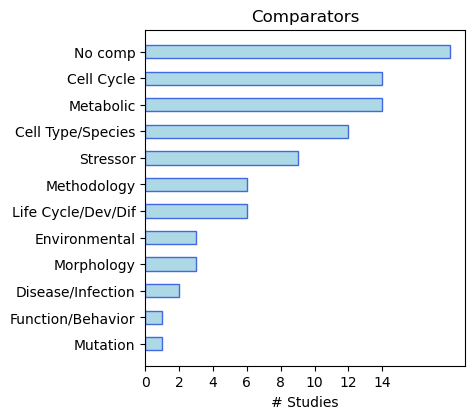

In [451]:
# comparators/conditions
comps = pd.read_excel('Table S2_Data_extraction_and_Analysis.xlsx', sheet_name='Fig6B Data')
comps
plt.barh(comps['Class'],comps['Count'],0.5,color='lightblue',edgecolor='royalblue')
# # plt.invert_yaxis()
plt.subplots_adjust(left=0.4, right=0.9, bottom=0.2, top=0.9) #prevents labels from being cut off on the left
plt.xticks(np.arange(0, 16, step=2)) 
plt.title('Comparators')
plt.xlabel('# Studies')
plt.savefig('Fig6B_comps_300dpi.jpg',dpi=300)